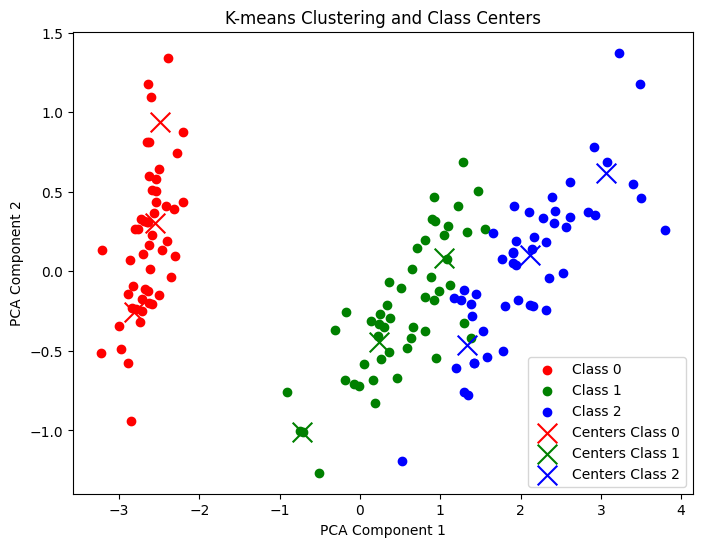

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 加载 Iris 数据集
data = load_iris()
X = data.data
y = data.target

# 对单个类别（如类别 0）进行 k-means 聚类
class_0_data = X[y == 0]
kmeans_0 = KMeans(n_clusters=3, random_state=42).fit(class_0_data)
centers_0 = kmeans_0.cluster_centers_

# 对其他类别进行 k-means 聚类
class_1_data = X[y == 1]
kmeans_1 = KMeans(n_clusters=3, random_state=42).fit(class_1_data)
centers_1 = kmeans_1.cluster_centers_

class_2_data = X[y == 2]
kmeans_2 = KMeans(n_clusters=3, random_state=42).fit(class_2_data)
centers_2 = kmeans_2.cluster_centers_

# 使用 PCA 降维到 2D 进行可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 绘制类别点和簇中心
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0][:, 0], X_pca[y == 0][:, 1], label='Class 0', c='r')
plt.scatter(X_pca[y == 1][:, 0], X_pca[y == 1][:, 1], label='Class 1', c='g')
plt.scatter(X_pca[y == 2][:, 0], X_pca[y == 2][:, 1], label='Class 2', c='b')

# 绘制簇中心
centers_0_pca = pca.transform(centers_0)
centers_1_pca = pca.transform(centers_1)
centers_2_pca = pca.transform(centers_2)

plt.scatter(centers_0_pca[:, 0], centers_0_pca[:, 1], label='Centers Class 0', c='r', marker='x', s=200)
plt.scatter(centers_1_pca[:, 0], centers_1_pca[:, 1], label='Centers Class 1', c='g', marker='x', s=200)
plt.scatter(centers_2_pca[:, 0], centers_2_pca[:, 1], label='Centers Class 2', c='b', marker='x', s=200)

plt.legend()
plt.title('K-means Clustering and Class Centers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



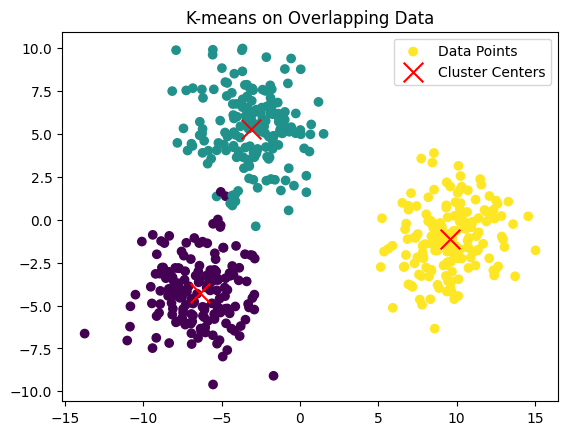

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 生成样本较为重叠的数据集
X, y = make_blobs(n_samples=500, centers=3, cluster_std=2.0, random_state=42)

# 使用 K-means 进行聚类
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
centers = kmeans.cluster_centers_

# 使用 PCA 降维到 2D 进行可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 绘制聚类结果和簇中心
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', label='Data Points')
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.legend()
plt.title('K-means on Overlapping Data')
plt.show()


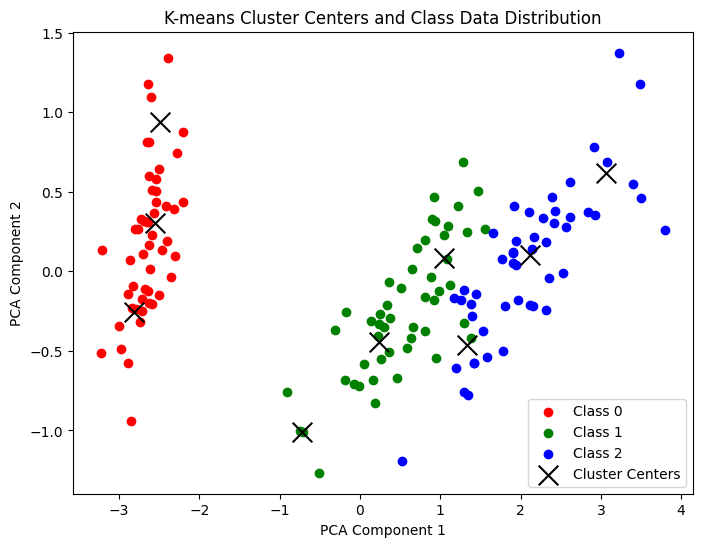

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 加载 Iris 数据集
data = load_iris()
X = data.data
y = data.target

# 创建一个颜色映射，用于区分不同类别
colors = ['r', 'g', 'b']

# 保存所有类别的簇中心
all_centers = []

# 对每个类别分别进行 K-means 聚类
for i in np.unique(y):
    class_data = X[y == i]

    # 对每一类的数据进行 K-means 聚类（设置为 3 个簇）
    kmeans = KMeans(n_clusters=3, random_state=42).fit(class_data)

    # 获取该类别的簇中心
    centers = kmeans.cluster_centers_

    # 保存簇中心
    all_centers.append(centers)

# 将所有簇中心转换为二维数组
all_centers = np.vstack(all_centers)

# 使用 PCA 将数据降维到 2D 进行可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centers_pca = pca.transform(all_centers)

# 绘制所有类别的数据点
plt.figure(figsize=(8, 6))
for i in np.unique(y):
    plt.scatter(X_pca[y == i][:, 0], X_pca[y == i][:, 1], label=f'Class {i}', color=colors[i])

# 绘制簇中心，使用不同的标记和颜色
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', marker='x', s=200, label='Cluster Centers')

# 添加图例和标题
plt.legend()
plt.title('K-means Cluster Centers and Class Data Distribution')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


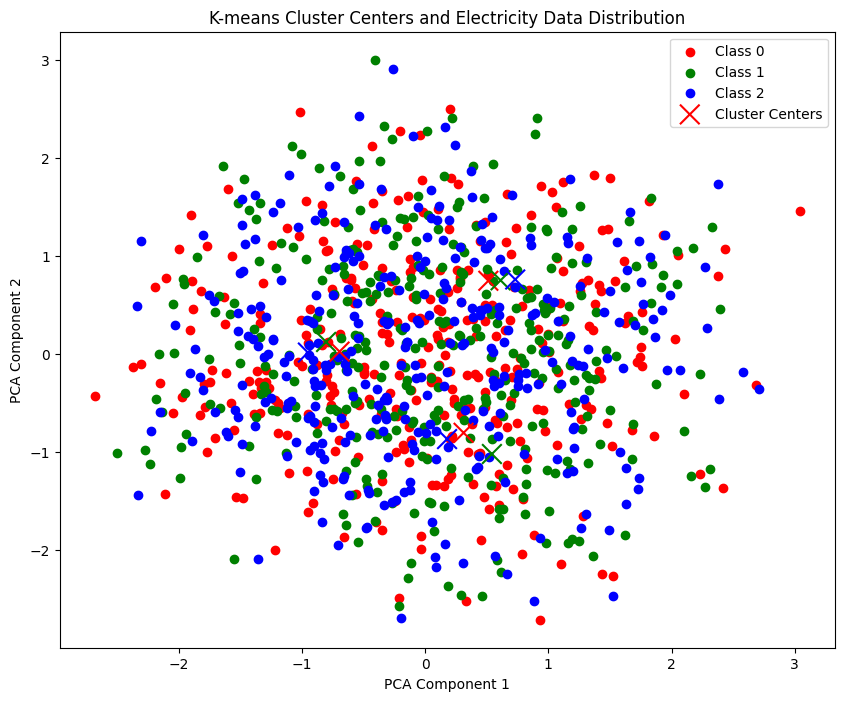

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 假设你已经加载了电力数据集
# df = pd.read_csv('Electricity_data.csv')

# 示例：假设数据已经加载并有类别标签'category'
# 数据格式假定为：特征数据 (X) 和 类别标签 (y)
# X = df.iloc[:, :-1].values  # 去掉最后一列类别标签
# y = df['category'].values   # 最后一列是类别标签

# 这里用随机数据模拟电力数据集
# 假设有三个类的数据
np.random.seed(42)
X = np.random.rand(1000, 5)  # 1000个样本，5个特征
y = np.random.choice([0, 1, 2], size=1000)  # 3个类

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 定义颜色映射，确保簇中心与数据点同类同色
colors = ['r', 'g', 'b']

# 保存所有类别的簇中心
all_centers = []
center_colors = []

# 对每个类别分别进行 K-means 聚类
for i in np.unique(y):
    class_data = X_scaled[y == i]

    # 对每一类的数据进行 K-means 聚类（这里选择 3 个簇）
    kmeans = KMeans(n_clusters=3, random_state=42).fit(class_data)

    # 获取该类别的簇中心
    centers = kmeans.cluster_centers_

    # 保存簇中心和对应的颜色
    all_centers.append(centers)
    center_colors.extend([colors[i]] * len(centers))

# 将所有簇中心转换为二维数组
all_centers = np.vstack(all_centers)

# 使用 PCA 将数据降维到 2D 进行可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centers_pca = pca.transform(all_centers)

# 绘制所有类别的数据点
plt.figure(figsize=(10, 8))
for i in np.unique(y):
    plt.scatter(X_pca[y == i][:, 0], X_pca[y == i][:, 1], label=f'Class {i}', color=colors[i])

# 绘制簇中心，使用相同类别的颜色
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c=center_colors, marker='x', s=200, label='Cluster Centers')

# 添加图例和标题
plt.legend()
plt.title('K-means Cluster Centers and Electricity Data Distribution')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


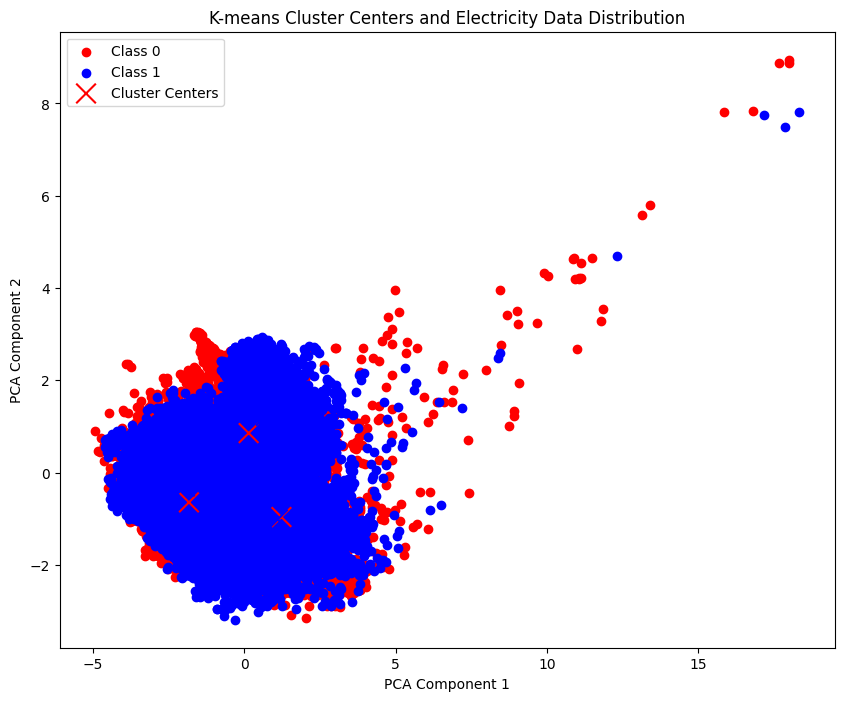

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 加载 class_0 和 class_1 的数据
path_class_0 = r'E:\FedStream\real_data_set\Electricity\Electricity_class\class_0.csv'
path_class_1 = r'E:\FedStream\real_data_set\Electricity\Electricity_class\class_1.csv'

# 读取 CSV 文件
class_0_data = pd.read_csv(path_class_0)
class_1_data = pd.read_csv(path_class_1)

# 假设数据的最后一列为标签
X_class_0 = class_0_data.values  # 获取 class_0 的特征数据
X_class_1 = class_1_data.values  # 获取 class_1 的特征数据

# 将数据标准化
scaler = StandardScaler()
X_class_0_scaled = scaler.fit_transform(X_class_0)
X_class_1_scaled = scaler.fit_transform(X_class_1)

# 定义颜色映射
colors = ['r', 'b']

# 对 class_0 和 class_1 数据分别进行 K-means 聚类
kmeans_0 = KMeans(n_clusters=3, random_state=42).fit(X_class_0_scaled)
kmeans_1 = KMeans(n_clusters=3, random_state=42).fit(X_class_1_scaled)

# 获取簇中心
centers_0 = kmeans_0.cluster_centers_
centers_1 = kmeans_1.cluster_centers_

# 合并簇中心
all_centers = np.vstack([centers_0, centers_1])
center_colors = ['r'] * len(centers_0) + ['b'] * len(centers_1)

# 使用 PCA 将数据降维到 2D 进行可视化
pca = PCA(n_components=2)
X_combined_scaled = np.vstack([X_class_0_scaled, X_class_1_scaled])
X_pca = pca.fit_transform(X_combined_scaled)
centers_pca = pca.transform(all_centers)

# 绘制所有类别的数据点
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:len(X_class_0_scaled), 0], X_pca[:len(X_class_0_scaled), 1], label='Class 0', color='r')
plt.scatter(X_pca[len(X_class_0_scaled):, 0], X_pca[len(X_class_0_scaled):, 1], label='Class 1', color='b')

# 绘制簇中心
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c=center_colors, marker='x', s=200, label='Cluster Centers')

# 添加图例和标题
plt.legend()
plt.title('K-means Cluster Centers and Electricity Data Distribution')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


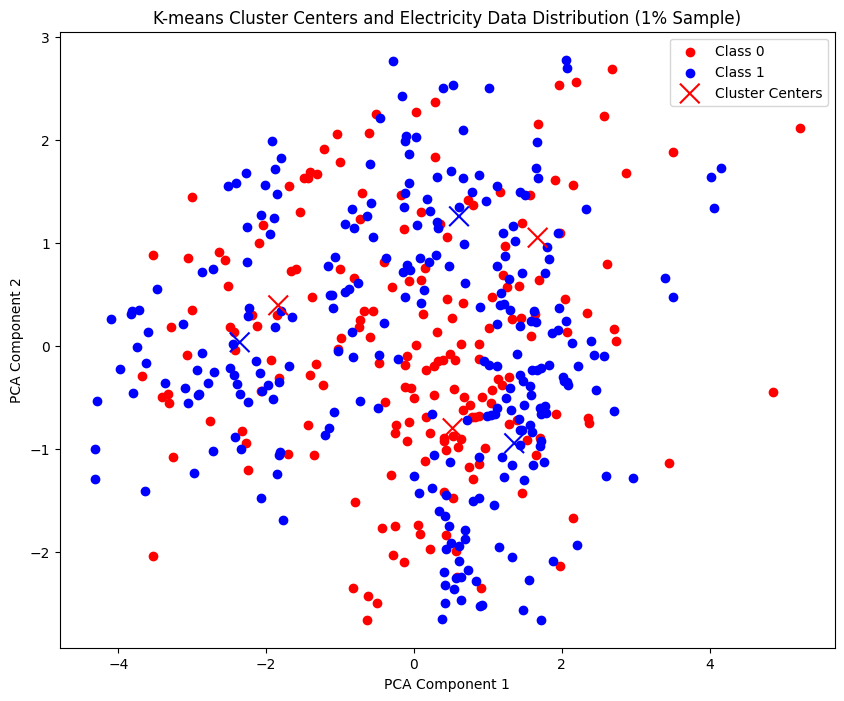

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 加载 class_0 和 class_1 的数据
path_class_0 = r'E:\FedStream\real_data_set\Electricity\Electricity_class\class_0.csv'
path_class_1 = r'E:\FedStream\real_data_set\Electricity\Electricity_class\class_1.csv'

# 读取 CSV 文件
class_0_data = pd.read_csv(path_class_0)
class_1_data = pd.read_csv(path_class_1)

# 抽取 1% 的数据
class_0_sample = class_0_data.sample(frac=0.01, random_state=42)
class_1_sample = class_1_data.sample(frac=0.01, random_state=42)

# 获取样本的特征数据
X_class_0 = class_0_sample.values
X_class_1 = class_1_sample.values

# 将数据标准化
scaler = StandardScaler()
X_class_0_scaled = scaler.fit_transform(X_class_0)
X_class_1_scaled = scaler.fit_transform(X_class_1)

# 定义颜色映射
colors = ['r', 'b']

# 对 class_0 和 class_1 数据分别进行 K-means 聚类
kmeans_0 = KMeans(n_clusters=3, random_state=42).fit(X_class_0_scaled)
kmeans_1 = KMeans(n_clusters=3, random_state=42).fit(X_class_1_scaled)

# 获取簇中心
centers_0 = kmeans_0.cluster_centers_
centers_1 = kmeans_1.cluster_centers_

# 合并簇中心
all_centers = np.vstack([centers_0, centers_1])
center_colors = ['r'] * len(centers_0) + ['b'] * len(centers_1)

# 使用 PCA 将数据降维到 2D 进行可视化
pca = PCA(n_components=2)
X_combined_scaled = np.vstack([X_class_0_scaled, X_class_1_scaled])
X_pca = pca.fit_transform(X_combined_scaled)
centers_pca = pca.transform(all_centers)

# 绘制所有类别的数据点
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:len(X_class_0_scaled), 0], X_pca[:len(X_class_0_scaled), 1], label='Class 0', color='r')
plt.scatter(X_pca[len(X_class_0_scaled):, 0], X_pca[len(X_class_0_scaled):, 1], label='Class 1', color='b')

# 绘制簇中心
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c=center_colors, marker='x', s=200, label='Cluster Centers')

# 添加图例和标题
plt.legend()
plt.title('K-means Cluster Centers and Electricity Data Distribution (1% Sample)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [8]:
import umap

# 使用 UMAP 将数据降维到 2D 进行可视化
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_combined_scaled)
centers_umap = umap_model.transform(all_centers)

# 绘制所有类别的数据点
plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:len(X_class_0_scaled), 0], X_umap[:len(X_class_0_scaled), 1], label='Class 0', color='r')
plt.scatter(X_umap[len(X_class_0_scaled):, 0], X_umap[len(X_class_0_scaled):, 1], label='Class 1', color='b')

# 绘制簇中心
plt.scatter(centers_umap[:, 0], centers_umap[:, 1], c=center_colors, marker='x', s=200, label='Cluster Centers')

# 添加图例和标题
plt.legend()
plt.title('K-means Cluster Centers and Electricity Data Distribution (1% Sample with UMAP)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()


ModuleNotFoundError: No module named 'umap'

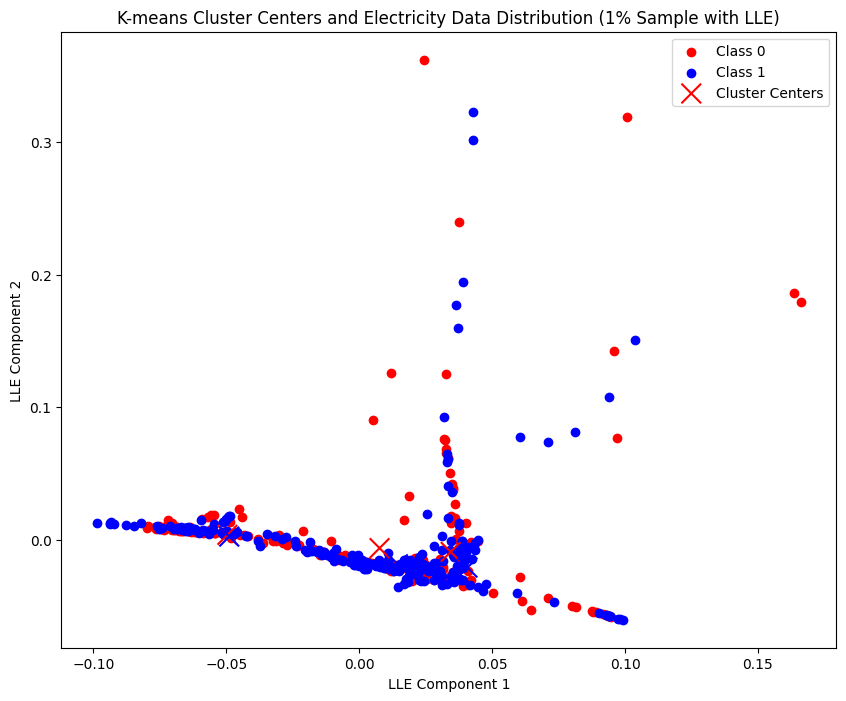

In [9]:
from sklearn.manifold import LocallyLinearEmbedding

# 使用 LLE 将数据降维到 2D 进行可视化
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X_combined_scaled)
centers_lle = lle.transform(all_centers)

# 绘制所有类别的数据点
plt.figure(figsize=(10, 8))
plt.scatter(X_lle[:len(X_class_0_scaled), 0], X_lle[:len(X_class_0_scaled), 1], label='Class 0', color='r')
plt.scatter(X_lle[len(X_class_0_scaled):, 0], X_lle[len(X_class_0_scaled):, 1], label='Class 1', color='b')

# 绘制簇中心
plt.scatter(centers_lle[:, 0], centers_lle[:, 1], c=center_colors, marker='x', s=200, label='Cluster Centers')

# 添加图例和标题
plt.legend()
plt.title('K-means Cluster Centers and Electricity Data Distribution (1% Sample with LLE)')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.show()


D:\ProgramData\Anaconda3\envs\python38\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


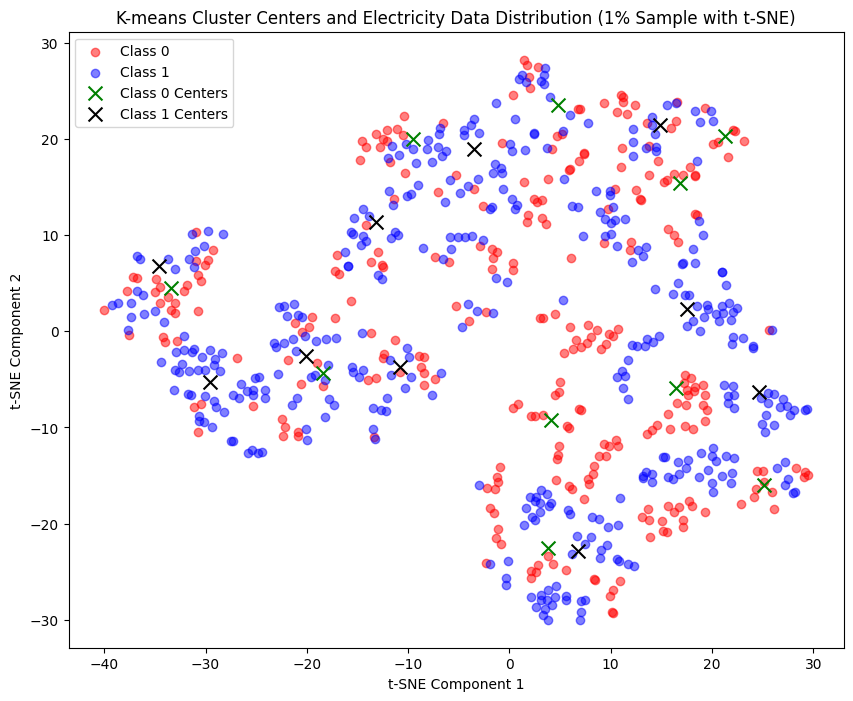

In [32]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# 加载 class_0 和 class_1 的数据
path_class_0 = r'E:\FedStream\real_data_set\Electricity\Electricity_class\class_0.csv'
path_class_1 = r'E:\FedStream\real_data_set\Electricity\Electricity_class\class_1.csv'

# 读取 CSV 文件
class_0_data = pd.read_csv(path_class_0)
class_1_data = pd.read_csv(path_class_1)

# 抽取 1% 的数据
class_0_sample = class_0_data.sample(frac=0.015, random_state=42)
class_1_sample = class_1_data.sample(frac=0.015, random_state=42)

# 获取样本的特征数据
X_class_0 = class_0_sample.values
X_class_1 = class_1_sample.values

# 将数据标准化
scaler = StandardScaler()
X_class_0_scaled = scaler.fit_transform(X_class_0)
X_class_1_scaled = scaler.fit_transform(X_class_1)

# 对 class_0 和 class_1 数据分别进行 K-means 聚类
kmeans_0 = KMeans(n_clusters=10, random_state=42).fit(X_class_0_scaled)
kmeans_1 = KMeans(n_clusters=10, random_state=42).fit(X_class_1_scaled)

# 获取簇中心
centers_0 = kmeans_0.cluster_centers_
centers_1 = kmeans_1.cluster_centers_

# 合并簇中心
all_centers = np.vstack([centers_0, centers_1])
center_colors = ['r'] * len(centers_0) + ['b'] * len(centers_1)

# 合并样本和簇中心，用于 t-SNE 降维
X_combined_scaled = np.vstack([X_class_0_scaled, X_class_1_scaled])
X_combined_with_centers = np.vstack([X_combined_scaled, all_centers])
# 初始化 t-SNE，显式指定 future-safe 的参数
# tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
# 使用 t-SNE 将数据和簇中心一起降维
tsne = TSNE(n_components=2, random_state=42, perplexity=30,init='pca', learning_rate='auto')
X_tsne_with_centers = tsne.fit_transform(X_combined_with_centers)

# 分离降维后的数据和簇中心
X_tsne = X_tsne_with_centers[:len(X_combined_scaled)]
centers_tsne = X_tsne_with_centers[len(X_combined_scaled):]

# 绘制所有类别的数据点
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:len(X_class_0_scaled), 0], X_tsne[:len(X_class_0_scaled), 1], label='Class 0', color='r', alpha=0.5)
plt.scatter(X_tsne[len(X_class_0_scaled):, 0], X_tsne[len(X_class_0_scaled):, 1], label='Class 1', color='b', alpha=0.5)

# 绘制簇中心
# centers_tsne 分为 Class 0 和 Class 1 的簇中心
centers_tsne_0 = centers_tsne[:len(centers_0)]
centers_tsne_1 = centers_tsne[len(centers_0):]

# 分别绘制 Class 0 和 Class 1 的中心点
plt.scatter(centers_tsne_0[:, 0], centers_tsne_0[:, 1], marker='x', s=100, label='Class 0 Centers', color='green')
plt.scatter(centers_tsne_1[:, 0], centers_tsne_1[:, 1], marker='x', s=100, label='Class 1 Centers', color='black')

# 添加图例和标题
plt.legend()
plt.title('K-means Cluster Centers and Electricity Data Distribution (1% Sample with t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


D:\ProgramData\Anaconda3\envs\python38\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


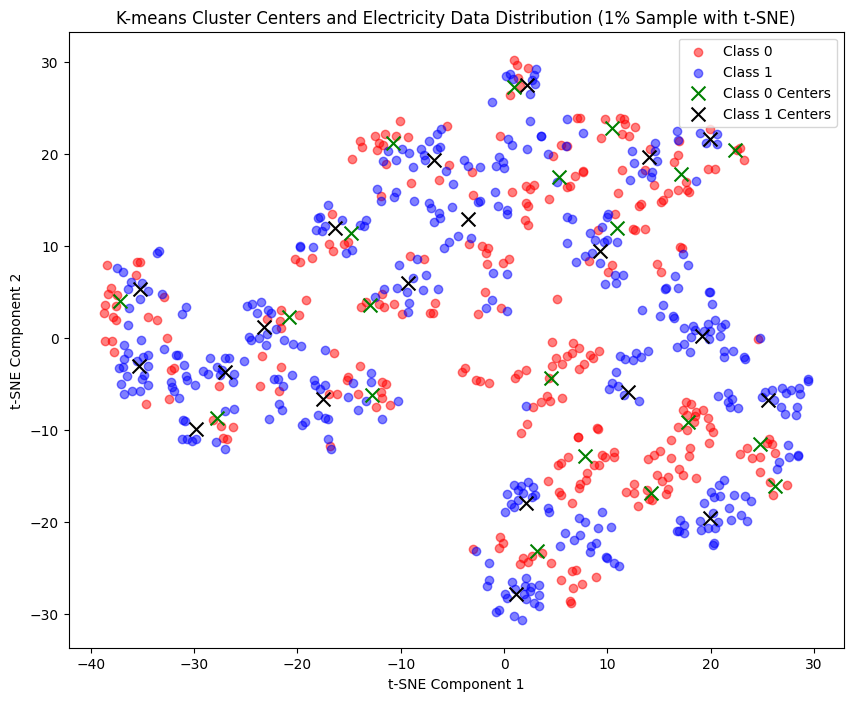

In [31]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# 加载 class_0 和 class_1 的数据
path_class_0 = r'E:\FedStream\real_data_set\Electricity\Electricity_class\class_0.csv'
path_class_1 = r'E:\FedStream\real_data_set\Electricity\Electricity_class\class_1.csv'

# 读取 CSV 文件
class_0_data = pd.read_csv(path_class_0)
class_1_data = pd.read_csv(path_class_1)

# 抽取 1% 的数据
class_0_sample = class_0_data.sample(frac=0.015, random_state=42)
class_1_sample = class_1_data.sample(frac=0.015, random_state=42)

# 获取样本的特征数据
X_class_0 = class_0_sample.values
X_class_1 = class_1_sample.values

# 将数据标准化
scaler = StandardScaler()
X_class_0_scaled = scaler.fit_transform(X_class_0)
X_class_1_scaled = scaler.fit_transform(X_class_1)

# 对 class_0 和 class_1 数据分别进行 K-means 聚类
kmeans_0 = KMeans(n_clusters=20, random_state=42).fit(X_class_0_scaled)
kmeans_1 = KMeans(n_clusters=20, random_state=42).fit(X_class_1_scaled)

# 获取簇中心
centers_0 = kmeans_0.cluster_centers_
centers_1 = kmeans_1.cluster_centers_

# 合并簇中心
all_centers = np.vstack([centers_0, centers_1])
center_colors = ['r'] * len(centers_0) + ['b'] * len(centers_1)

# 合并样本和簇中心，用于 t-SNE 降维
X_combined_scaled = np.vstack([X_class_0_scaled, X_class_1_scaled])
X_combined_with_centers = np.vstack([X_combined_scaled, all_centers])
# 初始化 t-SNE，显式指定 future-safe 的参数
# tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
# 使用 t-SNE 将数据和簇中心一起降维
tsne = TSNE(n_components=2, random_state=42, perplexity=30,init='pca', learning_rate='auto')
X_tsne_with_centers = tsne.fit_transform(X_combined_with_centers)

# 分离降维后的数据和簇中心
X_tsne = X_tsne_with_centers[:len(X_combined_scaled)]
centers_tsne = X_tsne_with_centers[len(X_combined_scaled):]

# 绘制所有类别的数据点
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:len(X_class_0_scaled), 0], X_tsne[:len(X_class_0_scaled), 1], label='Class 0', color='r', alpha=0.5)
plt.scatter(X_tsne[len(X_class_0_scaled):, 0], X_tsne[len(X_class_0_scaled):, 1], label='Class 1', color='b', alpha=0.5)

# 绘制簇中心
# centers_tsne 分为 Class 0 和 Class 1 的簇中心
centers_tsne_0 = centers_tsne[:len(centers_0)]
centers_tsne_1 = centers_tsne[len(centers_0):]

# 分别绘制 Class 0 和 Class 1 的中心点
plt.scatter(centers_tsne_0[:, 0], centers_tsne_0[:, 1], marker='x', s=100, label='Class 0 Centers', color='green')
plt.scatter(centers_tsne_1[:, 0], centers_tsne_1[:, 1], marker='x', s=100, label='Class 1 Centers', color='black')

# 添加图例和标题
plt.legend()
plt.title('K-means Cluster Centers and Electricity Data Distribution (1% Sample with t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


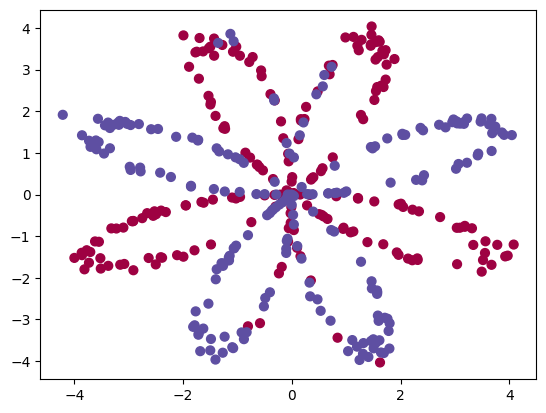

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def load_planar_dataset():
    np.random.seed(1)
    m = 400
    N = int(m/2)
    D = 2
    X = np.zeros((m,D))
    Y = np.zeros((m,1), dtype='uint8')
    a = 4

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2
        r = a*np.sin(4*t) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

X, Y = load_planar_dataset()
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.show()


<Figure size 800x600 with 0 Axes>

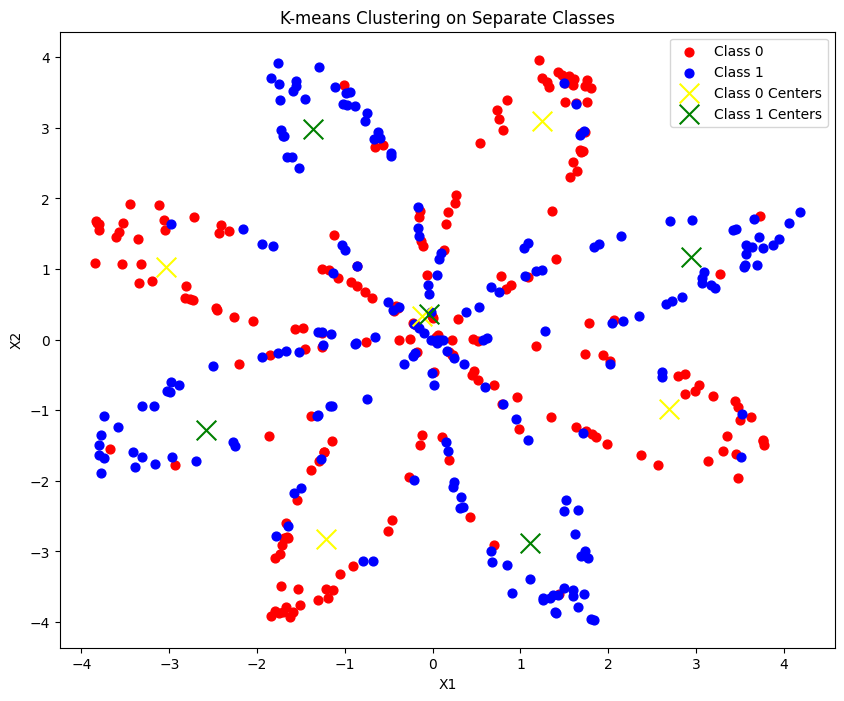

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 修改数据集生成函数
# 数据集生成函数：花瓣 1, 3, 5, 7 属于类 1，花瓣 2, 4, 6, 8 属于类 2
def load_planar_dataset_with_alternating_classes():
    np.random.seed(1)
    m = 400  # 总样本数
    N = int(m / 2)  # 每个类别的样本数
    D = 2  # 维度
    X = np.zeros((m, D))  # 数据矩阵
    Y = np.zeros((m, 1), dtype='uint8')  # 标签矩阵
    a = 4  # 控制半径的大小

    # 生成类 1 的数据（分布在花瓣 1, 3, 5, 7）
    for i, j in enumerate([0, 2, 4, 6]):
        ix = range(i * N // 4, (i + 1) * N // 4)
        t = np.linspace(j * np.pi / 4, (j + 1) * np.pi / 4, len(ix)) + np.random.randn(len(ix)) * 0.2  # 角度
        r = a * np.sin(4 * t) + np.random.randn(len(ix)) * 0.2  # 半径
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]  # 极坐标转换为笛卡尔坐标
        Y[ix] = 0  # 类别 1

    # 生成类 2 的数据（分布在花瓣 2, 4, 6, 8）
    for i, j in enumerate([1, 3, 5, 7]):
        ix = range(N + i * N // 4, N + (i + 1) * N // 4)
        t = np.linspace(j * np.pi / 4, (j + 1) * np.pi / 4, len(ix)) + np.random.randn(len(ix)) * 0.2  # 角度
        r = a * np.sin(4 * t) + np.random.randn(len(ix)) * 0.2  # 半径
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]  # 极坐标转换为笛卡尔坐标
        Y[ix] = 1  # 类别 2

    X = X.T
    Y = Y.T

    return X, Y

# 加载新生成的平面数据集
plt.figure(figsize=(8, 6))
X, Y = load_planar_dataset_with_alternating_classes()
# plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)
# 根据 Y 的标签将 X 数据分成两部分
X_class_0 = X[:, Y[0] == 0]
X_class_1 = X[:, Y[0] == 1]

# 分别对 class_0 和 class_1 进行 K-means 聚类
kmeans_class_0 = KMeans(n_clusters=5, random_state=42).fit(X_class_0.T)  # 注意这里要转置
kmeans_class_1 = KMeans(n_clusters=5, random_state=42).fit(X_class_1.T)

# 获取簇中心
centers_class_0 = kmeans_class_0.cluster_centers_
centers_class_1 = kmeans_class_1.cluster_centers_

# 绘制类别 0 和类别 1 的数据点
plt.figure(figsize=(10, 8))
plt.scatter(X_class_0[0, :], X_class_0[1, :], c='r', s=40, label='Class 0')
plt.scatter(X_class_1[0, :], X_class_1[1, :], c='b', s=40, label='Class 1')

# 绘制簇中心
plt.scatter(centers_class_0[:, 0], centers_class_0[:, 1], c='yellow', marker='x', s=200, label='Class 0 Centers')
plt.scatter(centers_class_1[:, 0], centers_class_1[:, 1], c='green', marker='x', s=200, label='Class 1 Centers')

# 添加图例和标题
plt.legend()
plt.title('K-means Clustering on Separate Classes')
plt.xlabel('X1')
plt.ylabel('X2')

# 显示图像
plt.show()

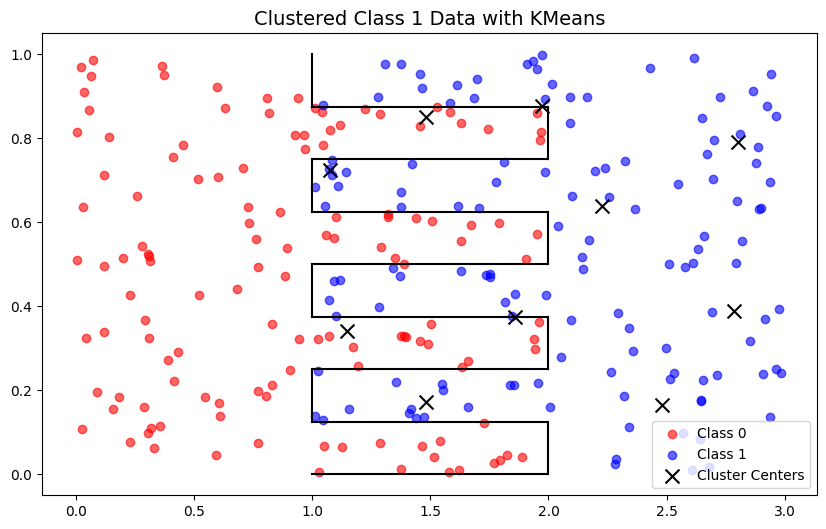

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def generate_alternating_middle_data(num_points_per_block=70, block_height=0.125):
    np.random.seed(42)

    # 左边类 0 的数据
    class_0_left = np.random.uniform(low=[0, 0], high=[1, 1], size=(num_points_per_block, 2))

    # 右边类 1 的数据
    class_1_right = np.random.uniform(low=[2, 0], high=[3, 1], size=(num_points_per_block, 2))

    # 中间部分交替分割
    class_0_middle = []
    class_1_middle = []

    for i in range(8):
        y_min = i * block_height
        y_max = (i + 1) * block_height

        if i % 2 == 0:
            # 奇数块属于类 0
            class_0_middle.append(np.random.uniform(low=[1, y_min], high=[2, y_max], size=(15, 2)))
        else:
            # 偶数块属于类 1
            class_1_middle.append(np.random.uniform(low=[1, y_min], high=[2, y_max], size=(15, 2)))

    # 合并数据
    class_0_middle = np.vstack(class_0_middle)
    class_1_middle = np.vstack(class_1_middle)

    X_class_0 = np.vstack([class_0_left, class_0_middle])
    X_class_1 = np.vstack([class_1_right, class_1_middle])

    X = np.vstack([X_class_0, X_class_1])
    Y = np.hstack([np.zeros(len(X_class_0)), np.ones(len(X_class_1))])

    return X, Y

# # 生成数据
# X, Y = generate_alternating_middle_data()
#
# # 绘制数据
# plt.figure(figsize=(10, 6))
# plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='r', label='Class 0', alpha=0.6)
# plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='b', label='Class 1', alpha=0.6)
# plt.title('Custom Data: Alternating Middle Block with Class 0 and Class 1')
# plt.xlabel('X axis')
# plt.ylabel('Y axis')
# plt.legend()
# plt.show()
# 生成数据
X, Y = generate_alternating_middle_data()

# 对属于类 1 的数据进行聚类
X_class_1 = X[Y == 1]  # 提取类 1 的数据
# 绘制中间部分的真实边界

# 使用 KMeans 对类 1 数据聚类，设定聚类簇数为 3
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_class_1)

# 获取簇中心
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# 绘制数据
plt.figure(figsize=(10, 6))
# 绘制中间部分的边界线
block_height = 0.125
x_left = 1.0  # 中间部分的左边界
x_right = 2.0  # 中间部分的右边界

for i in range(8):
    y = 1 - i * block_height
    # 交替绘制边界线
    if i % 2 == 1:
        # 画垂直线 (右边)
        plt.plot([x_right, x_right], [y, y - block_height], color='black')
        # 画水平线
        plt.plot([x_left, x_right], [y - block_height, y - block_height], color='black')
    else:
        # 画垂直线 (左边)
        plt.plot([x_left, x_left], [y, y - block_height], color='black')
        # 画水平线
        plt.plot([x_left, x_right], [y - block_height, y - block_height], color='black')

# 绘制类 0 的数据点
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='r', label='Class 0', alpha=0.6)
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='b', label='Class 1', alpha=0.6)

# 绘制类 1 的簇中心
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100, label='Cluster Centers')

plt.title('Clustered Class 1 Data with KMeans', fontsize=14)
# plt.xlabel('X axis')
# plt.ylabel('Y axis')
plt.legend()
plt.show()

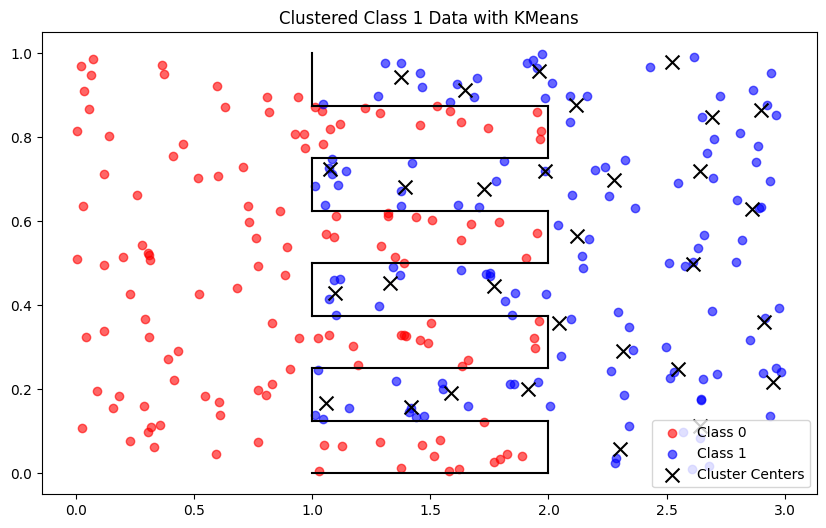

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def generate_alternating_middle_data(num_points_per_block=70, block_height=0.125):
    np.random.seed(42)

    # 左边类 0 的数据
    class_0_left = np.random.uniform(low=[0, 0], high=[1, 1], size=(num_points_per_block, 2))

    # 右边类 1 的数据
    class_1_right = np.random.uniform(low=[2, 0], high=[3, 1], size=(num_points_per_block, 2))

    # 中间部分交替分割
    class_0_middle = []
    class_1_middle = []

    for i in range(8):
        y_min = i * block_height
        y_max = (i + 1) * block_height

        if i % 2 == 0:
            # 奇数块属于类 0
            class_0_middle.append(np.random.uniform(low=[1, y_min], high=[2, y_max], size=(15, 2)))
        else:
            # 偶数块属于类 1
            class_1_middle.append(np.random.uniform(low=[1, y_min], high=[2, y_max], size=(15, 2)))

    # 合并数据
    class_0_middle = np.vstack(class_0_middle)
    class_1_middle = np.vstack(class_1_middle)

    X_class_0 = np.vstack([class_0_left, class_0_middle])
    X_class_1 = np.vstack([class_1_right, class_1_middle])

    X = np.vstack([X_class_0, X_class_1])
    Y = np.hstack([np.zeros(len(X_class_0)), np.ones(len(X_class_1))])

    return X, Y

# # 生成数据
# X, Y = generate_alternating_middle_data()
#
# # 绘制数据
# plt.figure(figsize=(10, 6))
# plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='r', label='Class 0', alpha=0.6)
# plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='b', label='Class 1', alpha=0.6)
# plt.title('Custom Data: Alternating Middle Block with Class 0 and Class 1')
# plt.xlabel('X axis')
# plt.ylabel('Y axis')
# plt.legend()
# plt.show()
# 生成数据
X, Y = generate_alternating_middle_data()

# 对属于类 1 的数据进行聚类
X_class_1 = X[Y == 1]  # 提取类 1 的数据
# 绘制中间部分的真实边界

# 使用 KMeans 对类 1 数据聚类，设定聚类簇数为 3
kmeans = KMeans(n_clusters=30, random_state=42)
kmeans.fit(X_class_1)

# 获取簇中心
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# 绘制数据
plt.figure(figsize=(10, 6))
# 绘制中间部分的边界线
block_height = 0.125
x_left = 1.0  # 中间部分的左边界
x_right = 2.0  # 中间部分的右边界

for i in range(8):
    y = 1 - i * block_height
    # 交替绘制边界线
    if i % 2 == 1:
        # 画垂直线 (右边)
        plt.plot([x_right, x_right], [y, y - block_height], color='black')
        # 画水平线
        plt.plot([x_left, x_right], [y - block_height, y - block_height], color='black')
    else:
        # 画垂直线 (左边)
        plt.plot([x_left, x_left], [y, y - block_height], color='black')
        # 画水平线
        plt.plot([x_left, x_right], [y - block_height, y - block_height], color='black')

# 绘制类 0 的数据点
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='r', label='Class 0', alpha=0.6)
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='b', label='Class 1', alpha=0.6)

# 绘制类 1 的簇中心
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100, label='Cluster Centers')

plt.title('Clustered Class 1 Data with KMeans')
# plt.xlabel('X axis')
# plt.ylabel('Y axis')
plt.legend()
plt.show()